In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.image as img


import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [40]:
DATASET_PATH = 'input/train.csv'
PREPARED_DATASET_PATH = 'output/train_prepared.csv'
DATASET_TEST_PATH = 'input/test.csv'

In [41]:
df = pd.read_csv(DATASET_PATH)
df_test = pd.read_csv(DATASET_TEST_PATH)

In [7]:
df.head ()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [8]:
df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [10]:
df.shape

(10000, 20)

In [42]:
df_test.shape

(5000, 19)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [11]:
df["Id"].nunique ()
df.drop('Id', axis=1, inplace=True)

In [12]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [13]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [14]:
df.describe(include=['object', 'bool'])

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [15]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [16]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [17]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
df.sort_values(by='Price', ascending=False).tail(20)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6007,25,3.0,62.355115,40.612146,7.0,3,5.0,1983,0.069753,B,B,53,13670,4,NaN,1,11,B,64298.216337
522,23,2.0,55.869625,54.177713,10.0,3,17.0,2015,0.005767,B,B,1,388,0,NaN,0,0,B,63900.205590
3107,23,1.0,33.560891,31.570440,1.0,8,9.0,2017,0.034656,B,B,0,168,0,NaN,0,0,B,63839.101051
7787,23,1.0,34.447615,NaN,0.0,2,0.0,1977,0.005767,B,B,1,388,0,NaN,0,0,B,63676.977734
4953,23,1.0,32.689327,30.176004,0.0,4,12.0,2018,0.034656,B,B,0,168,0,NaN,0,0,B,63624.320283
7072,23,1.0,34.023935,NaN,0.0,6,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,63587.764061
3544,84,2.0,45.301564,28.938437,5.0,3,5.0,1961,0.006076,B,B,30,5285,0,645.0,6,6,B,63136.859879
9150,23,1.0,29.719934,29.018910,1.0,4,15.0,2017,0.034656,B,B,0,168,0,NaN,0,0,B,63033.520743
9417,23,1.0,35.585538,30.738632,1.0,6,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,62980.779024
1326,23,1.0,27.981848,27.598712,8.0,13,15.0,2015,0.034656,B,B,0,168,0,NaN,0,0,B,62819.167655


# Обработка пропусков



In [19]:
df.isnull().sum()


DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [20]:
df_set=df.loc[df['LifeSquare'].isnull()==False][["Rooms","Square","LifeSquare", "KitchenSquare"]]
df_set["life_square_square_ration"] = df_set['LifeSquare']/df_set["Square"]

df_set.head(10)

,Rooms,Square,LifeSquare,KitchenSquare,life_square_square_ration
0,2.0,47.981561,29.442751,6.0,0.613626
1,3.0,65.683640,40.049543,8.0,0.609734
2,2.0,44.947953,29.197612,0.0,0.649587
3,2.0,53.352981,52.731512,9.0,0.988352
4,1.0,39.649192,23.776169,7.0,0.599663
5,3.0,80.384479,46.683720,12.0,0.580755
6,2.0,62.254114,37.160377,7.0,0.596914
9,1.0,46.461409,18.915552,8.0,0.407124
10,2.0,46.304907,27.922584,6.0,0.603016
11,3.0,68.808859,45.736906,7.0,0.664695


In [21]:
df.corr()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
DistrictId,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381
Social_1,0.246463,0.075980,-0.070690,-0.048363,0.043379,-0.044914,-0.020801,0.003026,0.026464,1.000000,0.955988,0.023721,0.077133,0.524593,0.526272,0.263286


### Анализ параметра Life_Square


[0, 250, 0, 0.2]

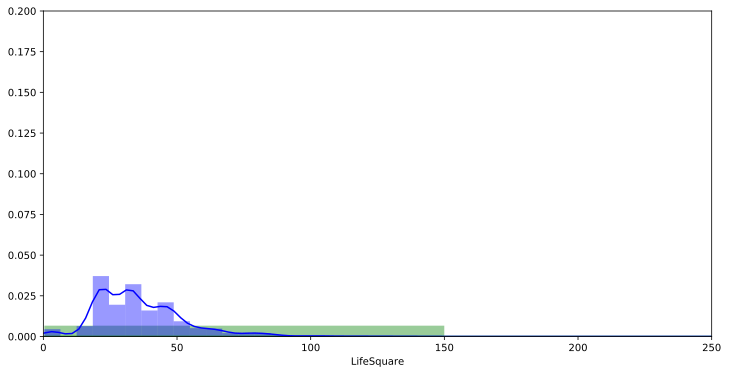

In [49]:
rcParams['figure.figsize'] = 12, 6
sns.distplot(df['LifeSquare'], color='g', bins=50, hist_kws={'alpha': 0.4});
sns.distplot(df_test['LifeSquare'], color='b', bins=50, hist_kws={'alpha': 0.4});
plt.axis([0, 250,0,0.200])

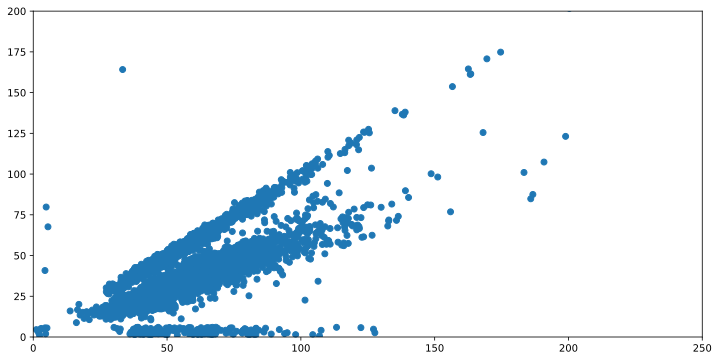

In [22]:
plt.scatter(df_set["Square"], df_set["LifeSquare"])
plt.axis([0, 250,0,200])
plt.show()

0.6175270005598533


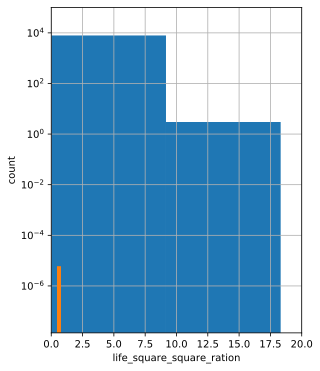

In [31]:


df_set["life_square_square_ration"].hist()
plt.yscale(value="log")
plt.ylabel('count')
plt.xlabel('life_square_square_ration');
y = np.linspace(0, 0.000005, 100)
Square_ratio_median = df_set['life_square_square_ration'].median()
plt.plot([Square_ratio_median] * 100, y, label='median', linestyle='-', linewidth=4)
plt.axis([0, 20,0, 100000])
print (Square_ratio_median)


plt.show()

In [37]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square']*Square_ratio_median
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### Анализ параметра Healthcare_1

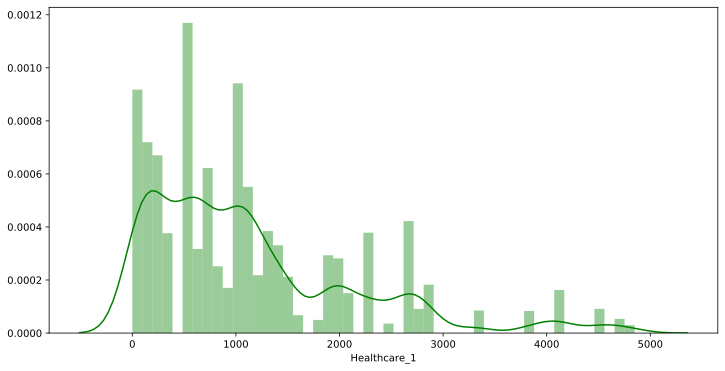

In [38]:
rcParams['figure.figsize'] = 12, 6
sns.distplot(df['Healthcare_1'], color='g', bins=50, hist_kws={'alpha': 0.4});

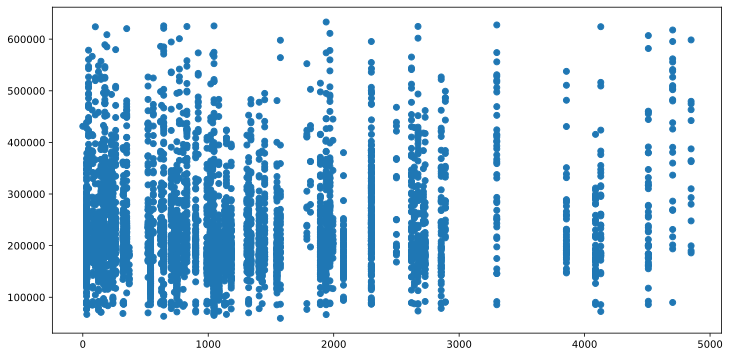

In [35]:
plt.scatter(df["Healthcare_1"], df["Price"])
#plt.axis([0, 250,0,200])
plt.show()

# Анализ целевой переменной

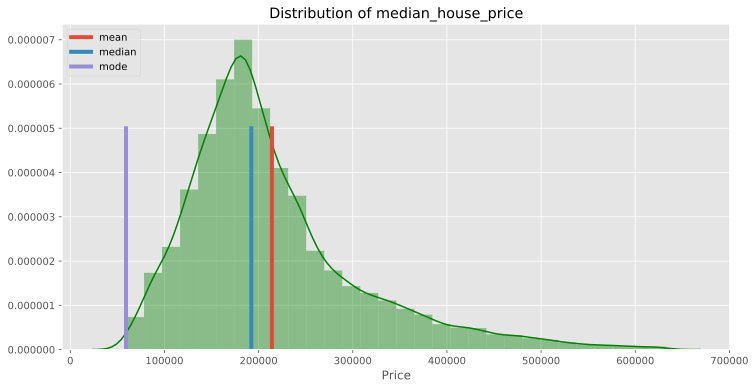

Среднее: 214138.86
Медиана: 192269.64487934904
Мода: 59174.77802758122


In [101]:
rcParams['figure.figsize'] = 12, 6
sns.distplot(df['Price'], color='g', bins=30, hist_kws={'alpha': 0.4});




target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle='-', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='-', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-', linewidth=4)
plt.title('Distribution of median_house_price')
plt.axis([0, 250,0,200])
plt.legend(loc = 'upper left')
plt.show()

print('Среднее:', target_mean) 
print('Медиана:', target_median) 
print('Мода:', target_mode)